**Install dependencies:** In case this notebook is not running [Carto-Lab Docker](https://cartolab.theplink.org/), the cell below aims to install the needed packages for this notebook. If packages are already available, they will be ignored.

In [4]:
import sys
pyexec = sys.executable
print(f"Current Kernel {pyexec}")
!../py/modules/pkginstall.sh "{pyexec}" geopandas fiona

Current Kernel /opt/conda/envs/worker_env/bin/python3.13
geopandas already installed (version 1.0.1).
fiona already installed (version 1.10.1).


# Common Spatial File Formats

```{admonition} Summary
:class: hint

This chapter explores how to read and interact with common spatial file formats using Python libraries like `json`, `pandas`, and `geopandas`. We will build upon the file path concepts introduced in the previous section.
```

In [5]:
from pathlib import Path

INPUT = Path.cwd().parents[0] / "00_data"
# Reference the example GeoJSON data file
mydata = INPUT / "Biotopwerte_Dresden_2018.geojson"

## Understanding file size

Before diving into specific formats, it's often useful to check the size of your data files. We can use the `pathlib` module for this.

In [6]:
# Get file statistics

file_stats = mydata.stat()
# Extract the file size in bytes
size = mydata.stat().st_size
print(f"File size (bytes): {size}")

File size (bytes): 82371724


Convert it to Megabyte, and format to showing two decimals by using f-strings.

In [7]:
# Convert to Megabytes and format to two decimal places
size_gb = size / 1024 / 1024
print(f'{size_gb:.2f} MB')

78.56 MB


**Explanation of f-string formatting**
- `f'{variable}`: Encloses a variable to be inserted into the string.
- `:f`: Treats the value as a float.
- `:.2f`: Specifies that the value should be treated as a float and rounded to two decimal places.

## JSON format
JSON (JavaScript Object Notation) is a format for storing and exchanging data. Python's built-in  [json package](https://docs.python.org/3/library/json.html) is used to work with JSON files.

In [8]:
import json

To access the content the following code is used:
- `with`: Ensures the file is properly closed after reading.
- `open`: Opens the file for reading.
- `load`: Reads the file (source) and parses the contents of the JSON file into `data` variable, as a Python dictionary or list, depending on the JSON structure.

In [9]:
# Accessing the content of the JSON file
with mydata.open() as source:
    data = json.load(source)

In [10]:
# Determine the data type of the loaded JSON
print(f"Data type of loaded JSON: {type(data)}")

Data type of loaded JSON: <class 'dict'>


If the JSON is a dictionary (`dict`), view its keys:

In [11]:
print(data.keys()) 

dict_keys(['displayFieldName', 'fieldAliases', 'geometryType', 'spatialReference', 'fields', 'features'])


Access the value of a specific the key - here by using the key `spatialReference` as an example:

In [12]:
data['spatialReference']

{'wkid': 25833, 'latestWkid': 25833}

Previewing large JSON data

In [13]:
print(json.dumps(data, indent=2)[0:200])

{
  "displayFieldName": "",
  "fieldAliases": {
    "FID": "FID",
    "CLC_st1": "CLC_st1",
    "Biotpkt201": "Biotpkt201",
    "Shape_Leng": "Shape_Leng",
    "Shape_Area": "Shape_Area"
  },
  "geome


Explaination of code snippet: 

- `json.dumps()` converts a Python dictionary into a JSON string.
- `indent=2` will prettify the output.
- `[0:200]` limits output to the first `200` characters.

`````{admonition} Print!
:class: danger

Printing large datasets directly with `print()` can lead to errors or unreadable output. If the data is too large it will show the following error:

```{figure} ../resources/10.png
:width: 700px
:name: figure-example

Printing error for large datasets
```
`````

### Working with JSON using Pandas

Often, a better way to view and work with data is using the `pandas` library. The `pd.json_normalize()` function is useful for converting nested JSON structures into a tabular format (DataFrame).

In [14]:
import pandas as pd

In [15]:
# Normalize the JSON data into a Pandas DataFrame
# Preview the top-level json structure using `pd.json_normalize()`
# Transpose the DataFrame for an Excel-like preview
pd.json_normalize(data, errors="ignore").T

0
displayFieldName                                                              
geometryType                                               esriGeometryPolygon
fields                       [{'name': 'FID', 'type': 'esriFieldTypeOID', '...
features                     [{'attributes': {'FID': 0, 'CLC_st1': '122', '...
fieldAliases.FID                                                           FID
fieldAliases.CLC_st1                                                   CLC_st1
fieldAliases.Biotpkt201                                             Biotpkt201
fieldAliases.Shape_Leng                                             Shape_Leng
fieldAliases.Shape_Area                                             Shape_Area
spatialReference.wkid                                                    25833
spatialReference.latestWkid                                              25833

## Tabular spatial data with GeoPandas

`geopandas` is an extension of `pandas` that adds support for geographic data. It introduces the `GeoDataFrame`, a data structure that can store both tabular data and geometric information.


In [16]:
import geopandas as gp

First, convert JSON dictionary to string:

In [17]:
# Ensure mydata is treated as a string path for geopandas
data_string = json.dumps(data)

In [18]:
# Directly reading a GeoJSON file into a GeoDataFrame
gdf = gp.read_file(data_string)

/opt/conda/envs/worker_env/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


In [19]:
print("\nFirst few rows of the GeoDataFrame:")
gdf.head()


First few rows of the GeoDataFrame:


FID CLC_st1  Biotpkt201  Shape_Leng   Shape_Area  \
0    0     122    5.271487  210.523801  3371.947771   
1    1     122    5.271487   31.935928    50.075513   
2    2     122    5.271487  810.640513  1543.310127   
3    3     122    5.271487   24.509066    36.443441   
4    4     122    5.271487   29.937138    40.494155   

                                            geometry  
0  POLYGON ((415775.635 5650481.473, 415776.403 5...  
1  POLYGON ((417850.525 5650376.33, 417846.393 56...  
2  POLYGON ((417886.917 5650544.364, 417909.326 5...  
3  POLYGON ((423453.146 5650332.06, 423453.576 56...  
4  POLYGON ((417331.434 5650889.039, 417330.611 5...

## Temporary data and ZIP files

In [20]:
import zipfile
import tempfile
import requests
from pathlib import Path

In [21]:
sample_data_url = 'https://datashare.tu-dresden.de/s/KEL6bZMn6GegEW4/download'

A temporary directory is created to avoid downloading and storing data permanently on the local system. The file path is defined by joining the `folder` and the `file name`. For this purpose, the `tempfile` library, which is included with Python, is used.

In [22]:
# Create a temporary directory
temp = Path(tempfile.mkdtemp())
zip_path = temp / "data.zip"

Next, the requests library is used to retrieve the data from the URL, and the content is written to the temporary file.

In [23]:
# Download the ZIP file
response = requests.get(sample_data_url)
with open(zip_path, 'wb') as file:
    file.write(response.content)

Since the file content is in ZIP format, it must be extracted.

In [24]:
# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(temp)

To see the files inside the temporary folder:

- Use `.glob("*")` to get a [generator](https://wiki.python.org/moin/Generators) generator listing all files.
- Convert the generator into a list using `list()` to display the files.

In [25]:
# View the contents of the temp folder
print("\nContents of the temporary directory:")
list(temp.glob("*"))


Contents of the temporary directory:


[PosixPath('/tmp/tmp8pwav16r/data.zip'),
 PosixPath('/tmp/tmp8pwav16r/Biotopwert.lyr'),
 PosixPath('/tmp/tmp8pwav16r/Biotopwerte Dresden 2018 Readme .txt'),
 PosixPath('/tmp/tmp8pwav16r/Biotopwerte_Dresden_2018.gdb.zip'),
 PosixPath('/tmp/tmp8pwav16r/Biotopwerte_Dresden_2018.geojson'),
 PosixPath('/tmp/tmp8pwav16r/Biotopwert_Biodiversität.zip'),
 PosixPath('/tmp/tmp8pwav16r/clc_legend.csv'),
 PosixPath('/tmp/tmp8pwav16r/MANIFEST.TXT')]

### Access a ZIP file from a remote server

To download and extract a ZIP file from a remote server:

- First, create a local working directory.
- Then use a helper method `tools.get_zip_extract()`, which has been prepared for this section.

In [26]:
from pathlib import Path

base_path = Path.cwd().parents[0]

INPUT = base_path / "00_data"
INPUT.mkdir(exist_ok=True)

Add the `py` module folder to your system path if necessary:

In [27]:
import sys

module_path = str(base_path / "py")
if module_path not in sys.path:
    sys.path.append(module_path)

from modules import tools

Use the helper function:

In [28]:
sample_data_url = 'https://datashare.tu-dresden.de/s/KEL6bZMn6GegEW4/download'

tools.get_zip_extract(
    uri_filename=sample_data_url,
    output_path=INPUT,
    write_intermediate=True
)

Loaded 48.03 MB of 48.04 (100%)..
Extracting zip..
Retrieved download, extracted size: 246.41 MB


## Geodatabase format

Considering a geodatabase stored as a ZIP file accessible via a URL, we must

- Handle HTTP requests and ZIP files,
- Create a temporary folder to avoid permanently storing data locally,
- Load the geospatial data,
- Work with file paths.

The following packages are used for this purpose: `requests`, `zipfile`, `tempfile`,`geopandas` and `os`.

In [29]:
import geopandas as gp

The workflow is similar to loading a **locally stored geodatabase**. First, the file path is generated, and the data is loaded from the defined path. 

In [30]:
gdb_path = temp / "Biotopwerte_Dresden_2018.gdb.zip"
gdf = gp.read_file(gdb_path)

If the Geodatabase contains multiple layers, and you do not specify a layer, only one default layer will be loaded.
Therefore, it is important to check which layers are available.

To do this, the `listlayers()` function from the `Fiona` library is imported:

In [31]:
from fiona import listlayers

Calling `listlayers(gdb_path)` will list the available layers in the geodatabase:

In [32]:
layers = listlayers(gdb_path)
print(layers)

['Biotopwerte_Dresden_2018']


Now the required layer can be explicitly loaded:

In [33]:
gdf = gp.read_file(gdb_path, layer="Biotopwerte_Dresden_2018")

You can quickly preview the contents of the `GeoDataFrame`:

In [34]:
gdf

CLC_st1  Biotpkt2018  Shape_Length    Shape_Area  \
0         122     5.271487    210.523801   3371.947771   
1         122     5.271487     31.935928     50.075513   
2         122     5.271487    810.640513   1543.310127   
3         122     5.271487     24.509066     36.443441   
4         122     5.271487     29.937138     40.494155   
...       ...          ...           ...           ...   
33918     124     8.000000      9.072443      4.947409   
33919     124     8.000000   1369.670301  63201.087919   
33920     124     8.000000    395.094767    708.068118   
33921     231    10.981298    110.373766     99.282910   
33922     231    10.981298   1401.832280  38939.551849   

                                                geometry  
0      MULTIPOLYGON (((415775.635 5650481.473, 415776...  
1      MULTIPOLYGON (((417850.525 5650376.33, 417846....  
2      MULTIPOLYGON (((417886.917 5650544.364, 417909...  
3      MULTIPOLYGON (((423453.146 5650332.06, 423453....  
4      MULTIPOLYGON (((417331.434 5650889.039, 417330...  
...                                                  ...  
33918  MULTIPOLYGON (((414814.645 5666810.533, 414814...  
33919  MULTIPOLYGON (((414791.962 5666543.765, 414803...  
33920  MULTIPOLYGON (((415006.509 5666816.796, 415004...  
33921  MULTIPOLYGON (((417478.532 5665012.465, 417477...  
33922  MULTIPOLYGON (((417482.897 5665014.048, 417475...  

[33923 rows x 5 columns]

To create a simple visualization, use the `plot` method (explained in the [Creating Map](https://stag.training.fdz.ioer.info/notebooks/305_mapping.html#creating-maps) section). 

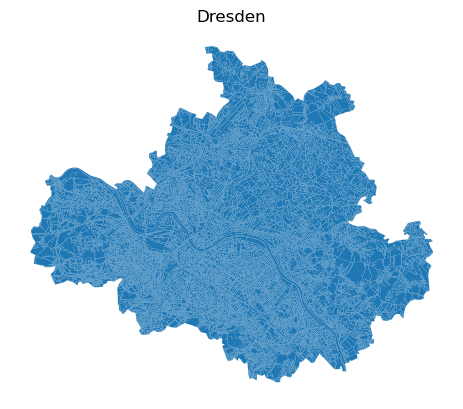

In [35]:
import matplotlib.pyplot as plt

ax = gdf.plot()
ax.set_title('Dresden')
ax.set_axis_off()

## Shapefile format

Similarly, shapefiles can be loaded and plotted using GeoPandas.

In [36]:
# Define the path to the shapefile
shapefile_path = INPUT / "Biotopwerte_Dresden_2018.shp"
# Read the shapefile
shapes = gp.read_file(shapefile_path)
# Preview the loaded data
shapes

CLC_st1  Biotpkt201   Shape_Leng    Shape_Area  \
0         122    5.271487   210.523801   3371.947771   
1         122    5.271487    31.935928     50.075513   
2         122    5.271487   810.640513   1543.310127   
3         122    5.271487    24.509066     36.443441   
4         122    5.271487    29.937138     40.494155   
...       ...         ...          ...           ...   
33918     124    8.000000     9.072443      4.947409   
33919     124    8.000000  1369.670301  63201.087919   
33920     124    8.000000   395.094767    708.068118   
33921     231   10.981298   110.373766     99.282910   
33922     231   10.981298  1401.832280  38939.551849   

                                                geometry  
0      POLYGON ((415775.635 5650481.473, 415776.403 5...  
1      POLYGON ((417850.525 5650376.33, 417846.393 56...  
2      POLYGON ((417886.917 5650544.364, 417909.326 5...  
3      POLYGON ((423453.146 5650332.06, 423453.576 56...  
4      POLYGON ((417331.434 5650889.039, 417330.611 5...  
...                                                  ...  
33918  POLYGON ((414814.645 5666810.533, 414814.225 5...  
33919  POLYGON ((414791.962 5666543.765, 414803.055 5...  
33920  POLYGON ((415006.509 5666816.796, 415004.399 5...  
33921  POLYGON ((417478.532 5665012.465, 417477.463 5...  
33922  POLYGON ((417482.897 5665014.048, 417475.749 5...  

[33923 rows x 5 columns]